In [2]:
import pandas as pd
import numpy as np

In [3]:
park_df =pd.read_csv('/content/drive/MyDrive/Datasets/parkinsons (1)/parkinsons (1).data')

In [4]:
park_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
park_df.shape

(195, 24)

In [6]:
park_df.duplicated().sum()

np.int64(0)

In [7]:
park_df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [8]:
park_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [10]:
park_df['status']

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [12]:
park_df['status'].value_counts(normalize =True)

,proportion
status,
1,0.753846
0,0.246154


#Imbalanced Dataset
Proportion of Healty to Sick is 75% compared to 25%
Snote will be needed


Dependecies:


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [15]:
park_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [16]:
for col in park_df.columns:
  print(col)
  print(park_df[col].value_counts())

name
name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
                 ..
phon_R01_S50_2    1
phon_R01_S50_3    1
phon_R01_S50_4    1
phon_R01_S50_5    1
phon_R01_S50_6    1
Name: count, Length: 195, dtype: int64
MDVP:Fo(Hz)
MDVP:Fo(Hz)
119.992    1
122.400    1
116.682    1
116.676    1
116.014    1
          ..
174.188    1
209.516    1
174.688    1
198.764    1
214.289    1
Name: count, Length: 195, dtype: int64
MDVP:Fhi(Hz)
MDVP:Fhi(Hz)
157.302    1
148.650    1
131.111    1
137.871    1
141.781    1
          ..
230.978    1
253.017    1
240.005    1
396.961    1
260.277    1
Name: count, Length: 195, dtype: int64
MDVP:Flo(Hz)
MDVP:Flo(Hz)
74.997     1
113.819    1
111.555    1
111.366    1
110.655    1
          ..
94.261     1
89.488     1
74.287     1
74.904     1
77.973     1
Name: count, Length: 195, dtype: int64
MDVP:Jitter(%)
MDVP:Jitter(%)
0.00369    3
0.00742    3
0.00694    3
0.00968    2
0.00544    2
          ..
0

In [17]:
for col2 in park_df.columns:
  print(col2,f'Number of unique values: {park_df[col2].nunique()}')
  print(park_df[col2].value_counts())

name Number of unique values: 195
name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
                 ..
phon_R01_S50_2    1
phon_R01_S50_3    1
phon_R01_S50_4    1
phon_R01_S50_5    1
phon_R01_S50_6    1
Name: count, Length: 195, dtype: int64
MDVP:Fo(Hz) Number of unique values: 195
MDVP:Fo(Hz)
119.992    1
122.400    1
116.682    1
116.676    1
116.014    1
          ..
174.188    1
209.516    1
174.688    1
198.764    1
214.289    1
Name: count, Length: 195, dtype: int64
MDVP:Fhi(Hz) Number of unique values: 195
MDVP:Fhi(Hz)
157.302    1
148.650    1
131.111    1
137.871    1
141.781    1
          ..
230.978    1
253.017    1
240.005    1
396.961    1
260.277    1
Name: count, Length: 195, dtype: int64
MDVP:Flo(Hz) Number of unique values: 195
MDVP:Flo(Hz)
74.997     1
113.819    1
111.555    1
111.366    1
110.655    1
          ..
94.261     1
89.488     1
74.287     1
74.904     1
77.973     1
Name: count, Length: 195, dtype:

<Axes: >

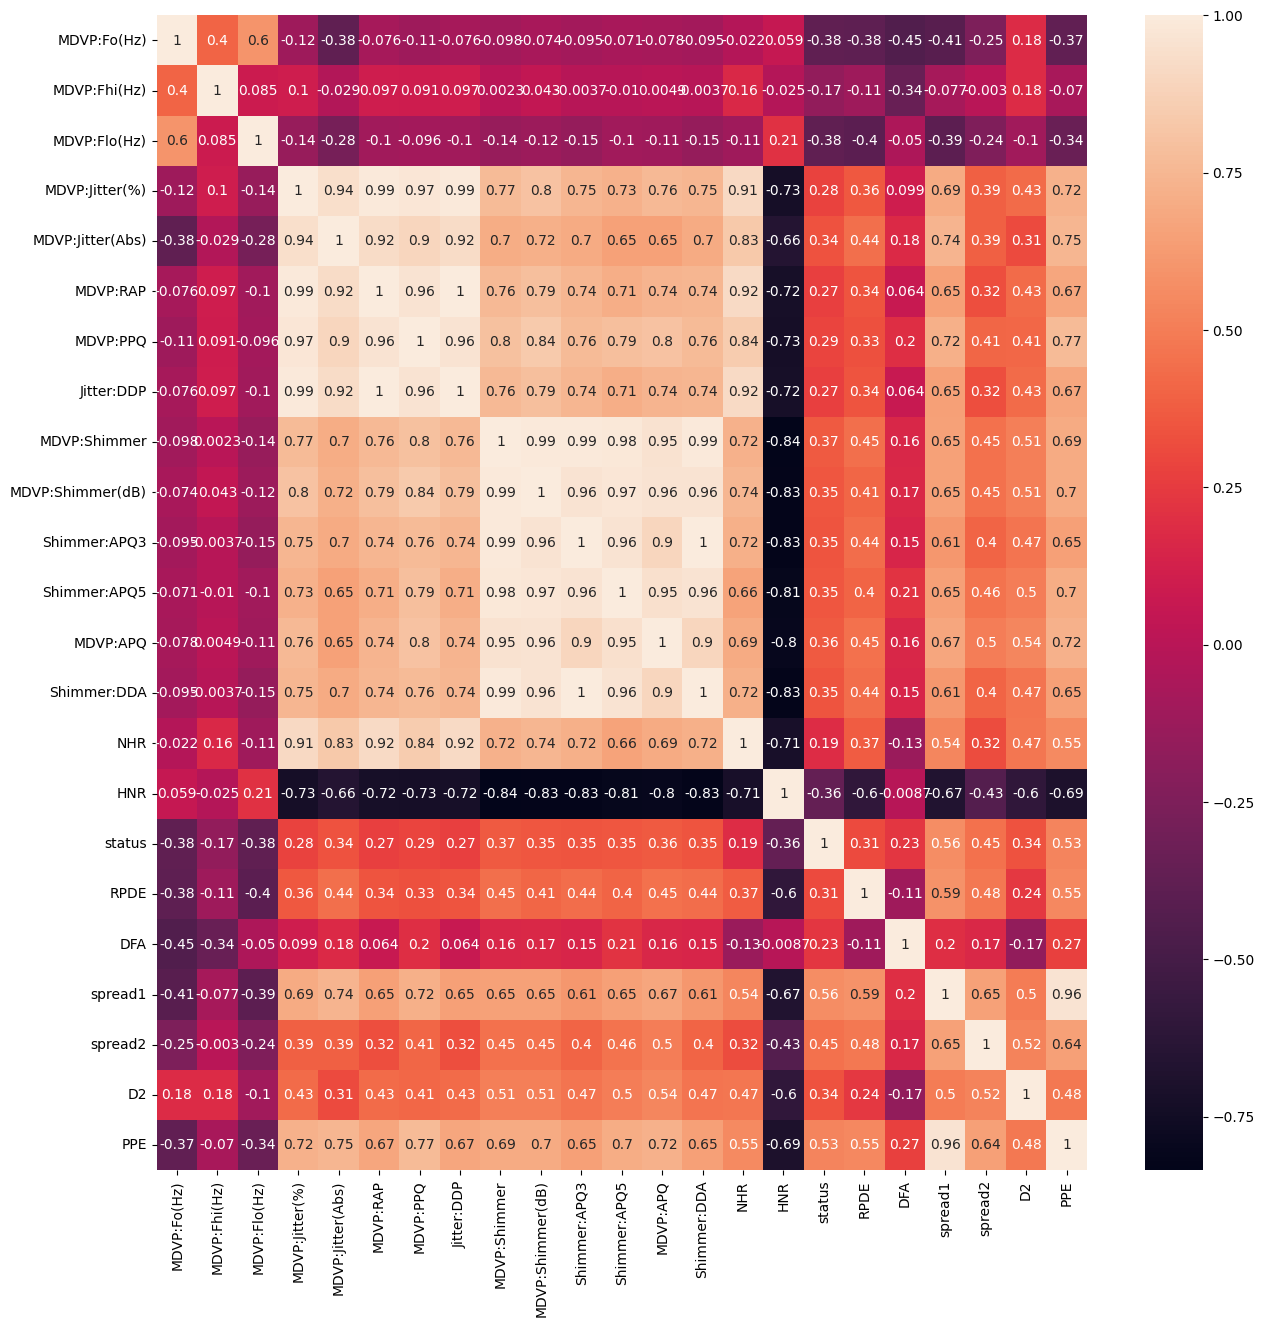

In [19]:
corr_matrix =park_df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)

In [22]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.any().any(): # Ensure a single boolean value
      print(f'{column}:has outliers')
      df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    else:
      print(f'{column}:No outliers')
    return df
num_col=park_df.select_dtypes(include=np.number).columns
for col in num_col:
  handle_outliers(park_df,col)

MDVP:Fo(Hz):No outliers
MDVP:Fhi(Hz):has outliers
MDVP:Flo(Hz):has outliers
MDVP:Jitter(%):has outliers
MDVP:Jitter(Abs):has outliers
MDVP:RAP:has outliers
MDVP:PPQ:has outliers
Jitter:DDP:has outliers
MDVP:Shimmer:has outliers
MDVP:Shimmer(dB):has outliers
Shimmer:APQ3:has outliers
Shimmer:APQ5:has outliers
MDVP:APQ:has outliers
Shimmer:DDA:has outliers
NHR:has outliers
HNR:has outliers
status:has outliers
RPDE:No outliers
DFA:No outliers
spread1:has outliers
spread2:has outliers
D2:has outliers
PPE:has outliers


In [23]:
# Display column names and their meanings
print("\nColumn Information:")
print("Features typically include:")
print("- name: Patient identifier")
print("- MDVP:Fo(Hz): Average vocal fundamental frequency")
print("- MDVP:Fhi(Hz): Maximum vocal fundamental frequency")
print("- MDVP:Flo(Hz): Minimum vocal fundamental frequency")
print("- Various jitter and shimmer measurements (voice quality)")
print("- NHR, HNR: Noise-to-harmonics ratios")
print("- status: Target variable (0=healthy, 1=Parkinson's)")
print("- RPDE, DFA: Nonlinear dynamical complexity measures")
print("- PPE: Pitch period entropy")


Column Information:
Features typically include:
- name: Patient identifier
- MDVP:Fo(Hz): Average vocal fundamental frequency
- MDVP:Fhi(Hz): Maximum vocal fundamental frequency
- MDVP:Flo(Hz): Minimum vocal fundamental frequency
- Various jitter and shimmer measurements (voice quality)
- NHR, HNR: Noise-to-harmonics ratios
- status: Target variable (0=healthy, 1=Parkinson's)
- RPDE, DFA: Nonlinear dynamical complexity measures
- PPE: Pitch period entropy


In [24]:
print('Target Column Analysis')
park_df['status'].value_counts()

Target Column Analysis


,count
status,
1.0,147
0.0,48


In [25]:
parkinsons_clean =park_df.copy()

In [30]:
original_columns = parkinsons_clean.columns
og_col =list(original_columns)
cleanup_col =[]
for col in og_col:
  clean_col ="".join(col.split('.'))
  clean_col = "".join(c if c.isalnum() else "_" for c in clean_col)
  cleanup_col.append(clean_col)
parkinsons_clean_new =parkinsons_clean.copy()
parkinsons_clean_new.columns = cleanup_col
parkinsons_clean_new.head()

,name,MDVP_Fo_Hz_,MDVP_Fhi_Hz_,MDVP_Flo_Hz_,MDVP_Jitter___,MDVP_Jitter_Abs_,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.005540,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.006960,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.007098,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.006980,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.007098,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [31]:
parkinsons_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP_Fo_Hz_       195 non-null    float64
 2   MDVP_Fhi_Hz_      195 non-null    float64
 3   MDVP_Flo_Hz_      195 non-null    float64
 4   MDVP_Jitter___    195 non-null    float64
 5   MDVP_Jitter_Abs_  195 non-null    float64
 6   MDVP_RAP          195 non-null    float64
 7   MDVP_PPQ          195 non-null    float64
 8   Jitter_DDP        195 non-null    float64
 9   MDVP_Shimmer      195 non-null    float64
 10  MDVP_Shimmer_dB_  195 non-null    float64
 11  Shimmer_APQ3      195 non-null    float64
 12  Shimmer_APQ5      195 non-null    float64
 13  MDVP_APQ          195 non-null    float64
 14  Shimmer_DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [34]:
parkinsons_df =parkinsons_clean_new.copy()

In [35]:
if 'status' in parkinsons_df.columns:
    target_col = 'status'
elif 'class' in parkinsons_df.columns:
    target_col = 'class'
else:
    target_col = [c for c in parkinsons_df.columns
                  if parkinsons_df[c].dtype == 'int64'
                  and parkinsons_df[c].nunique() == 2][0]

print(f"Target column: {target_col}")


Target column: status


In [36]:
parkinsons_clean = parkinsons_df.copy()
initial_rows = len(parkinsons_clean)
parkinsons_clean = parkinsons_clean.drop_duplicates()
final_rows = len(parkinsons_clean)
print(f"Removed {initial_rows - final_rows} duplicate rows")


Removed 0 duplicate rows


In [38]:
parkinsons_model_data = parkinsons_clean.copy()
id_column = None
possible_ids = ['name', 'id', 'patient_id', 'subject_id']
for col in possible_ids:
    if col in parkinsons_model_data.columns:
        id_column = col
        break


In [40]:
target_column = 'status'

In [41]:
feature_columns = [c for c in parkinsons_model_data.columns if c not in [id_column, target_column]]
X = parkinsons_model_data[feature_columns]
y = parkinsons_model_data[target_column]


In [43]:
RND = 42

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RND, stratify=y
)



In [45]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Training set size: (156, 22)
Testing set size: (39, 22)
status
1.0    0.75641
0.0    0.24359
Name: proportion, dtype: float64
status
1.0    0.74359
0.0    0.25641
Name: proportion, dtype: float64


#Smote Training Set


In [46]:
from collections import Counter

In [47]:
print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

Train distribution: Counter({1.0: 118, 0.0: 38})
Test distribution: Counter({1.0: 29, 0.0: 10})


In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.75, random_state=RND)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("Train distribution:", Counter(y_train_res))
print("Test distribution:", Counter(y_test))


Train distribution: Counter({1.0: 118, 0.0: 88})
Test distribution: Counter({1.0: 29, 0.0: 10})


In [50]:
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression

# # Instantiate the models
# svc_model = SVC(random_state=RND)
# rf_model = RandomForestClassifier(random_state=RND)
# gbm_model = GradientBoostingClassifier(random_state=RND)
# lr_model = LogisticRegression(random_state=RND)

In [51]:
# from sklearn.tree import DecisionTreeClassifier

# dt_model = DecisionTreeClassifier(random_state=RND)

In [53]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

# Define stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND)

# Candidate models with hyperparameter grids
models_and_params = {
    "LogisticRegression": (
        LogisticRegression(max_iter=500, random_state=RND),
        {"C": [0.01, 0.1, 1, 10], "solver": ["lbfgs", "liblinear"]}
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=RND),
        {"n_estimators": [100, 300, 500], "max_depth": [None, 5, 10]}
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=RND),
        {"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [100, 300, 500]}
    ),
    "SVM": (
        SVC(probability=True, random_state=RND),
        {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="logloss", random_state=RND, use_label_encoder=False),
        {"learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7], "n_estimators": [100, 300]}
    ),
}

best_models = []

# Loop through models
for name, (model, params) in models_and_params.items():
    print(f"🔍 Running GridSearchCV for {name}...")
    grid = GridSearchCV(
        model, params,
        scoring="roc_auc", cv=cv, n_jobs=-1
    )
    grid.fit(X_train_res, y_train_res)

    # Get best params & score
    best_score = grid.best_score_
    best_model = grid.best_estimator_
    print(f"✅ {name} Best ROC-AUC: {best_score:.4f}")
    print(f"Best Params: {grid.best_params_}")

    # Save results
    best_models.append((name, best_model, best_score))

# Pick the best
best_models.sort(key=lambda x: x[2], reverse=True)
print("\n🏆 Best Model:", best_models[0][0], "ROC-AUC:", best_models[0][2])
final_model = best_models[0][1]

# Train on resampled data & evaluate on original test set
final_model.fit(X_train_res, y_train_res)
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print("ROC-AUC on Test Set:", roc_auc_score(y_test, y_proba))


🔍 Running GridSearchCV for LogisticRegression...
✅ LogisticRegression Best ROC-AUC: 0.9093
Best Params: {'C': 10, 'solver': 'liblinear'}
🔍 Running GridSearchCV for RandomForest...
✅ RandomForest Best ROC-AUC: 0.9792
Best Params: {'max_depth': None, 'n_estimators': 100}
🔍 Running GridSearchCV for GradientBoosting...
✅ GradientBoosting Best ROC-AUC: 0.9909
Best Params: {'learning_rate': 0.2, 'n_estimators': 300}
🔍 Running GridSearchCV for SVM...
✅ SVM Best ROC-AUC: 0.9051
Best Params: {'C': 10, 'kernel': 'linear'}
🔍 Running GridSearchCV for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:59:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Best ROC-AUC: 0.9875
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

🏆 Best Model: GradientBoosting ROC-AUC: 0.9908662498815952

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

ROC-AUC on Test Set: 0.9896551724137931


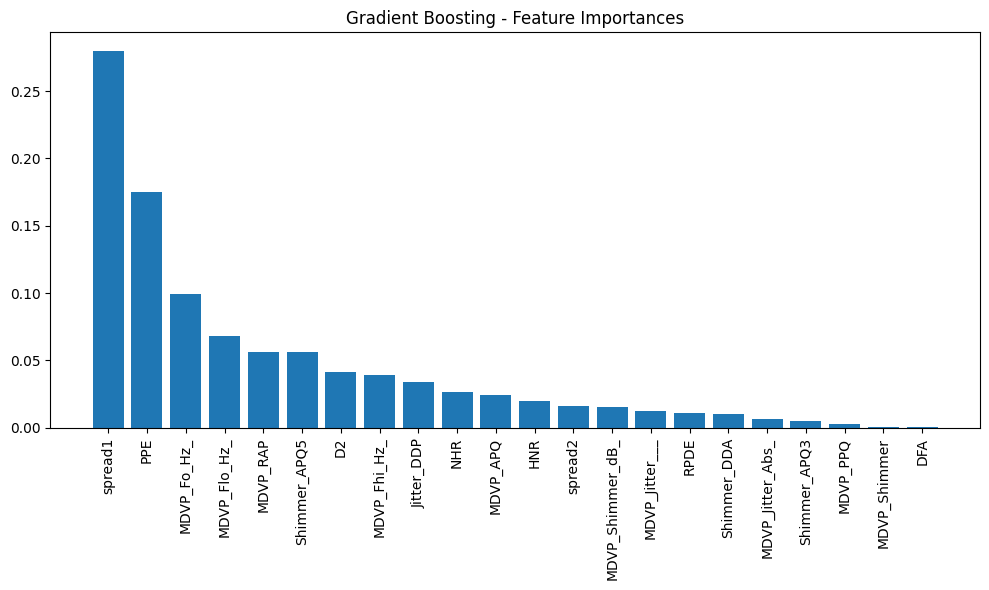

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top features
plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting - Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(X_train.columns)[indices], rotation=90)
plt.tight_layout()
plt.show()


In [55]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:02:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


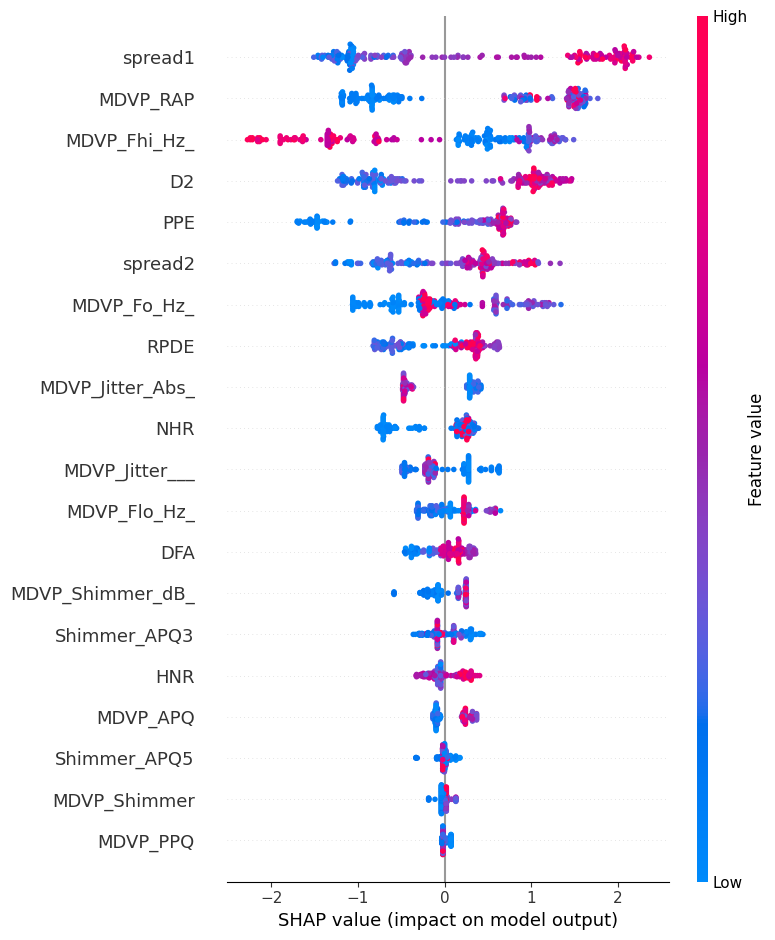

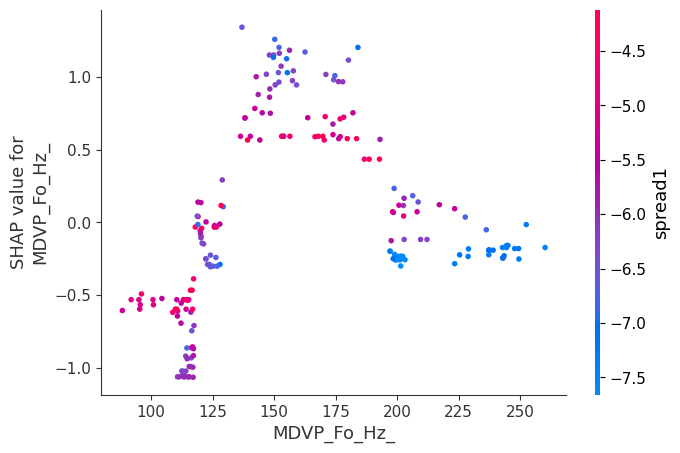

In [56]:
import shap

# Train the chosen model
best_model.fit(X_train_res, y_train_res)

# SHAP Explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_res)

# Summary Plot
shap.summary_plot(shap_values, X_train_res)

# Dependence Plot (for a specific feature)
shap.dependence_plot(0, shap_values, X_train_res)  # Feature index 0


In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Apply SMOTE on training set only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [59]:
best_model.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:05:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [60]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_proba))


              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

ROC-AUC: 0.9896551724137931


In [63]:

selected_features = list(X_train.columns)


In [64]:
import joblib
import pickle

# Save the trained model with joblib
joblib.dump(best_model, "best_model.joblib")

# Save the features list with pickle
with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features, f)

print("✅ Model and features saved successfully!")




✅ Model and features saved successfully!
